## 머신러닝
# 유방암 데이터
- 30개의 속성
- malignant(악성)/benign(양성) 이진분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [6]:
cancer.data.shape

(569, 30)

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
for i,fn in enumerate(cancer.feature_names):
    print(i,'\t',fn)

0 	 mean radius
1 	 mean texture
2 	 mean perimeter
3 	 mean area
4 	 mean smoothness
5 	 mean compactness
6 	 mean concavity
7 	 mean concave points
8 	 mean symmetry
9 	 mean fractal dimension
10 	 radius error
11 	 texture error
12 	 perimeter error
13 	 area error
14 	 smoothness error
15 	 compactness error
16 	 concavity error
17 	 concave points error
18 	 symmetry error
19 	 fractal dimension error
20 	 worst radius
21 	 worst texture
22 	 worst perimeter
23 	 worst area
24 	 worst smoothness
25 	 worst compactness
26 	 worst concavity
27 	 worst concave points
28 	 worst symmetry
29 	 worst fractal dimension


### 산점도

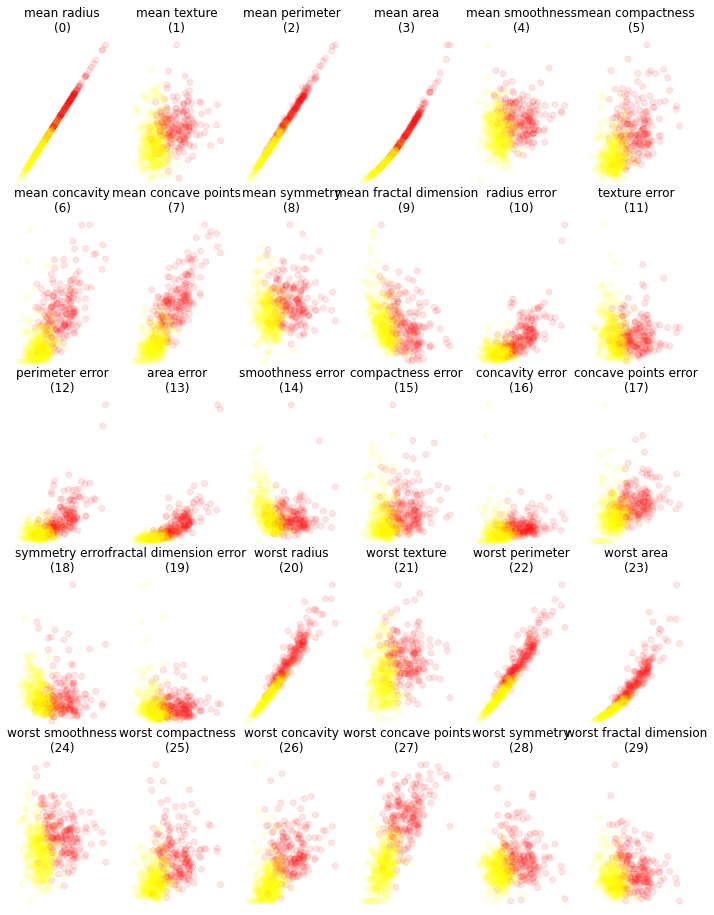

In [13]:
fig,axes = plt.subplots(5,6,figsize=[12,16])

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='autumn', alpha=0.1)
    plt.title(cancer.feature_names[i]+('\n(%d)' % i))
    plt.axis('off')

### 히스토그램

In [10]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
malignant.shape, benign.shape

((212, 30), (357, 30))

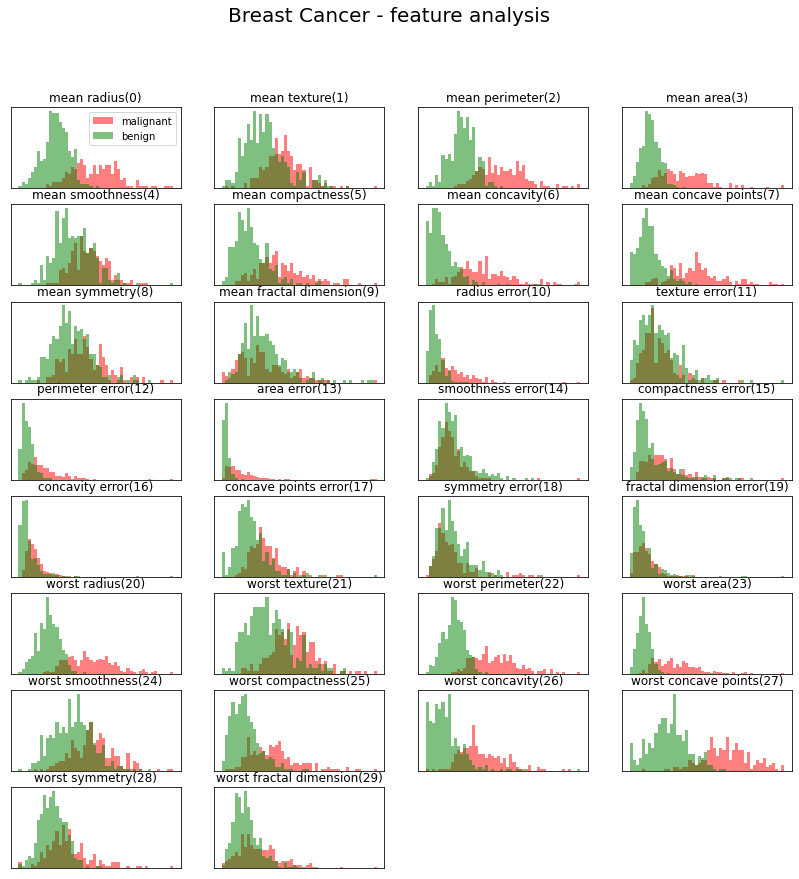

In [11]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(30):
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

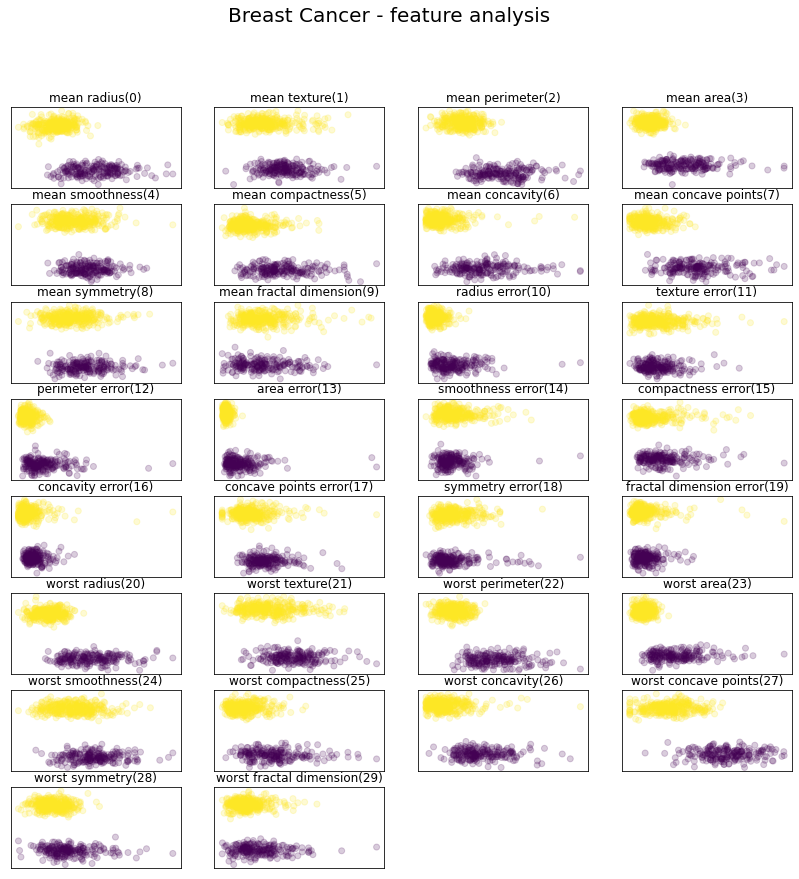

In [4]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    plt.scatter(cancer.data[:,col], cancer.target+np.random.normal(0,0.1,size=569),
                c=cancer.target, alpha=0.2)
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])

### 박스플롯

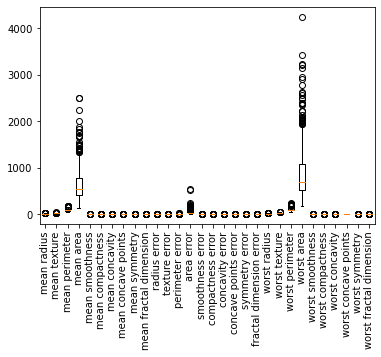

In [17]:
plt.boxplot(cancer.data)
plt.xticks(range(1,31), cancer.feature_names, rotation=90)
pass

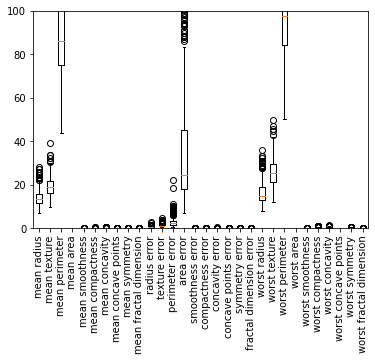

In [18]:
plt.boxplot(cancer.data)
plt.xticks(range(1,31), cancer.feature_names, rotation=90)
plt.ylim([0,100])
pass

> 정규화가 필요한가?

### 속성들 간의 상관관계 (correlation)

In [5]:
np.corrcoef(cancer.data[:,0], cancer.data[:,22])

array([[1.        , 0.96513651],
       [0.96513651, 1.        ]])

In [6]:
mat = np.corrcoef(cancer.data.T)
mat.shape

(30, 30)

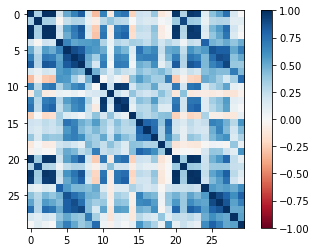

In [7]:
plt.imshow(mat, vmin=-1, vmax=1, cmap='RdBu')
plt.colorbar()

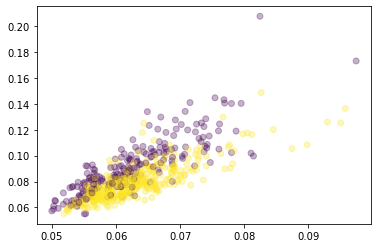

In [10]:
plt.scatter(cancer.data[:,9], cancer.data[:,29], c= cancer.target, alpha=0.3)

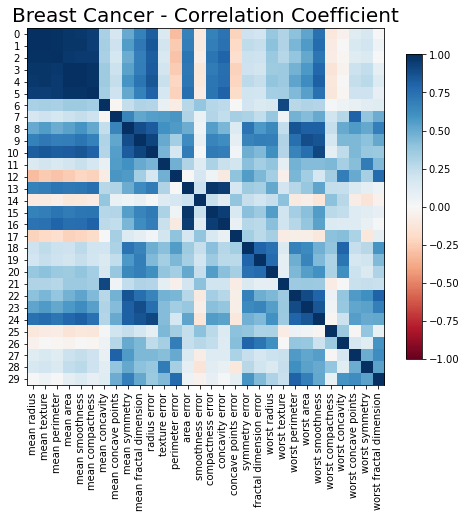

In [11]:
l = [0,2,3,20,22,23, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 25, 26, 27, 18,19,24,28, 29]

cancer2 = cancer.data[:,l]
mat2 = np.corrcoef(cancer2.T)


fig=plt.figure(figsize=[8,8])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat2, interpolation='none', vmin=-1, vmax=1, cmap='RdBu')
plt.colorbar(shrink=0.7)
plt.xticks(range(30),cancer.feature_names,rotation=90,ha='center')
plt.yticks(range(30))
pass